# 02 Baseline Anomaly Detection

This notebook begins the Week 2 task of applying preprocessing, run Isolation Forest, basic anomaly detection.



### **Step 1 - Import Required Libraries**

We begin by importing the necessary libraries for data handling, visualisation, and modelling. These libraries provide the core tools required for preparing the data, creating plots, scaling values, and detecting anomalies:

- pandas - used for loading, organising, and manipulating the dataset in tabular form.

- numpy - provides support for efficient numerical operations and array handling.

- matplotlib.pyplot - enables creation of static plots for visualising time series data and results.

- seaborn - enhances visualisation with more attractive and informative statistical plots.

- MinMaxScaler (from sklearn.preprocessing) - scales features to a defined range (0 to 1 in our case), essential for distance-based models.

- IsolationForest (from sklearn.ensemble) - implements the Isolation Forest algorithm, used here for unsupervised anomaly detection.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

---

### **Step 2 - Define File Path**

We define the relative path to the dataset. This assumes that `InternalBleeding14.csv` is stored in the `data/` subfolder.


In [ ]:
file_path = 'data/InternalBleeding14.csv'

---

### **Step 3 - Load Dataset**

We load the dataset into a pandas DataFrame for further exploration and processing.


In [ ]:
df = pd.read_csv(file_path, sep=",")

---

### **Step 4 - Preview the Dataset**
We print the first 10 rows to check that the data has loaded correctly and to confirm that the `timestamp` and `value` columns are present and well-formed.



In [ ]:
print("\nFirst 10 rows of dataset:")
display(df.head(10))


First 10 rows of dataset:


,timestamp,value
0,0,97.46170
1,1,97.38159
2,2,97.18323
3,3,96.96197
4,4,96.67206
5,5,96.55380
6,6,96.62247
7,7,96.48132
8,8,96.52329
9,9,96.79413


##### **Observations from the Preview**

The `timestamp` column begins at 0 and increments sequentially, suggesting a regular time index.  
The `value` column contains floating-point sensor readings with no obvious irregularities or missing values.  
These entries suggest that the dataset is correctly structured and ready for further inspection.

---

### **Step 5 - Normalise value column (Min-Max Scaling)**


We apply Min-Max scaling to normalise the `value` column between 0 and 1.  
This ensures that features are on the same scale, which is important for distance-based models like clustering and anomaly detection.


In [ ]:
scaler = MinMaxScaler()
df['value_scaled'] = scaler.fit_transform(df[['value']])

##### **Display first few scaled values for confirmation**

In [ ]:
print("\nFirst 10 scaled values:")
print(df[['value', 'value_scaled']].head(10))


First 10 scaled values:
      value  value_scaled
0  97.46170      0.733364
1  97.38159      0.731460
2  97.18323      0.726746
3  96.96197      0.721487
4  96.67206      0.714597
5  96.55380      0.711786
6  96.62247      0.713418
7  96.48132      0.710064
8  96.52329      0.711061
9  96.79413      0.717498


##### **Observations from Scaled Values**

The value_scaled column shows that the original signal values have been successfully transformed to a 0–1 range. Higher original values correspond to scaled values closer to 1, and lower original values correspond to values nearer 0, as expected from Min-Max scaling.

---

### **Step 6 - Apply Isolation Forest for anomaly detection**


In this step, we use Isolation Forest to identify potential anomalies in the scaled signal.  
Isolation Forest is an unsupervised model designed to detect outliers by isolating data points that behave differently from the majority.

##### **Define model**

We define the Isolation Forest model with 100 trees (`n_estimators=100`) and set the expected proportion of anomalies to 5% (`contamination=0.05`).  
A fixed `random_state` ensures reproducibility of the results.


In [ ]:
isolation_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['anomaly_score'] = isolation_forest.fit_predict(df[['value_scaled']])

##### **Display the first 10 rows with anomaly scores**

This output will show the original value, its scaled version, and whether the model classified it as normal (1) or anomalous (-1).


In [ ]:
print("\nFirst 10 rows with anomaly scores:")
print(df[['value', 'value_scaled', 'anomaly_score']].head(10))


First 10 rows with anomaly scores:
      value  value_scaled  anomaly_score
0  97.46170      0.733364              1
1  97.38159      0.731460              1
2  97.18323      0.726746              1
3  96.96197      0.721487              1
4  96.67206      0.714597              1
5  96.55380      0.711786              1
6  96.62247      0.713418              1
7  96.48132      0.710064              1
8  96.52329      0.711061              1
9  96.79413      0.717498              1


**Observations from Anomaly Scores**

The first 10 rows all show an anomaly_score of 1, indicating that Isolation Forest has classified these points as normal. The model assigns 1 for inliers (normal points) and -1 for outliers (potential anomalies).

---

### **Step 7 - Convert anomaly output**


We convert the model's anomaly score to a clearer format for analysis and plotting.  
Here, `0` represents normal points and `1` represents anomalies.


In [ ]:
df['anomaly'] = df['anomaly_score'].map({1: 0, -1: 1})

##### **Display small sample for verification**


We display the first 10 rows of the dataset to verify that anomaly labels have been added correctly alongside the original values and scaled data.


In [ ]:
print("\nSample of dataset with anomaly predictions:")
display(df.head(10))


Sample of dataset with anomaly predictions:


,timestamp,value,value_scaled,anomaly_score,anomaly
0,0,97.46170,0.733364,1,0
1,1,97.38159,0.731460,1,0
2,2,97.18323,0.726746,1,0
3,3,96.96197,0.721487,1,0
4,4,96.67206,0.714597,1,0
5,5,96.55380,0.711786,1,0
6,6,96.62247,0.713418,1,0
7,7,96.48132,0.710064,1,0
8,8,96.52329,0.711061,1,0
9,9,96.79413,0.717498,1,0


##### **Observations from Sample Output**

The sample confirms that the anomaly column has been added correctly. All shown points are classified as normal (0), consistent with their anomaly_score of 1.


  - We display the first 10 rows after applying Isolation Forest.
  - New columns:
    - `value_scaled`: Original `value` column scaled between 0 and 1 using MinMaxScaler.
    - `anomaly_score`: Raw prediction from Isolation Forest (1 = normal, -1 = anomaly).
    - `anomaly`: Converted to binary indicator (0 = normal, 1 = anomaly).


##### **Print anomaly summary count**

We print a summary of how many points have been classified as normal (`0`) and as anomalies (`1`).  
This provides a quick check on the proportion of detected anomalies in the dataset.


In [ ]:
print("\nAnomaly counts:")
display(df['anomaly'].value_counts())


Anomaly counts:


,count
anomaly,
0,7127
1,374





##### **Anomaly Counts Summary**

  - Out of 7501 total samples:
    - 7127 are predicted as normal (`anomaly = 0`).
    - 374 are flagged as anomalies (`anomaly = 1`).
  - This matches the initial contamination setting of 5% in the Isolation Forest model.
  
- **Educational Note:**  
  The anomaly detection successfully identified a small fraction of observations as anomalous, which we will later explore further using dimensionality reduction and clustering methods in Week 3.


---

### **Step 8 - Visualisation**


Visualisation helps us interpret model outputs by placing them in the context of the original signal.  
By plotting the data, we can visually assess whether detected anomalies align with expected patterns or reveal unexpected behaviour.

##### **Plot original signal**

We plot the original signal to provide a reference for further visualisation steps.  
This forms the baseline against which anomalies and other processed outputs will be compared.




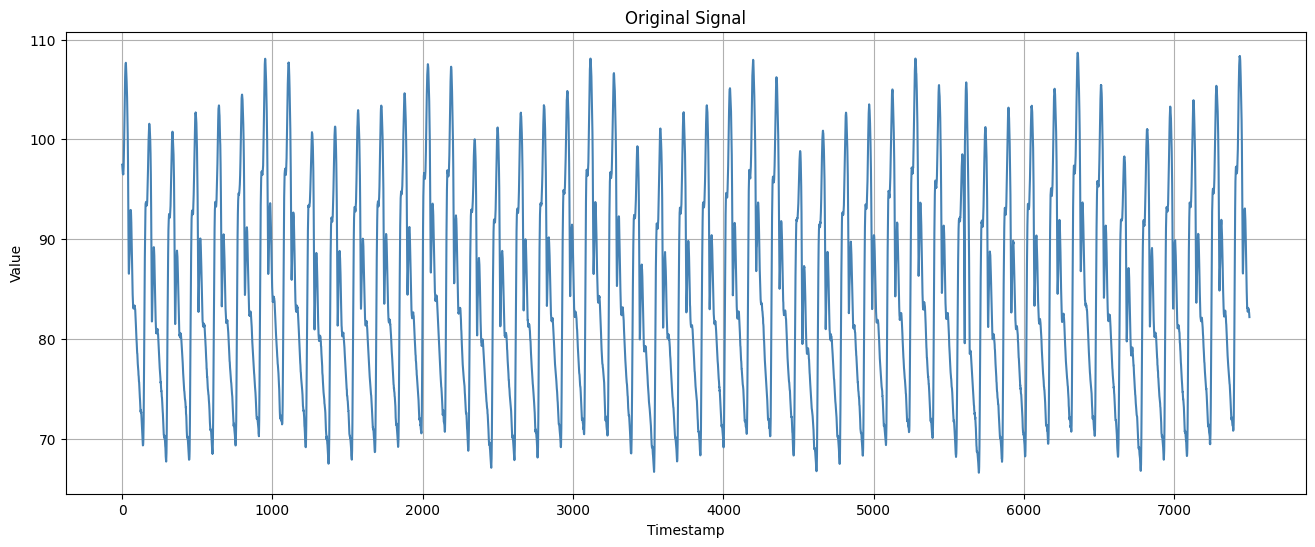

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(df['timestamp'], df['value'], label='Original Signal', color='steelblue')
plt.title('Original Signal')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid()
plt.show()

##### **Plot Description:**  

The plot displays the original signal across the full timestamp range.  
We observe a strong periodic pattern with consistent cycles and amplitude fluctuations between approximately 66 and 110.  
This visual baseline will help us interpret where anomalies may appear when overlaid in later steps.


##### **Overlay detected anomalies**

We now visualise the anomalies detected by the Isolation Forest by overlaying them on the original signal. This helps us assess whether the flagged points align with expected irregularities in the data.

The `plt.scatter()` function highlights points classified as anomalies (`anomaly == 1`) in red with 'x' markers. The plot includes labels, gridlines, and a legend for clarity.


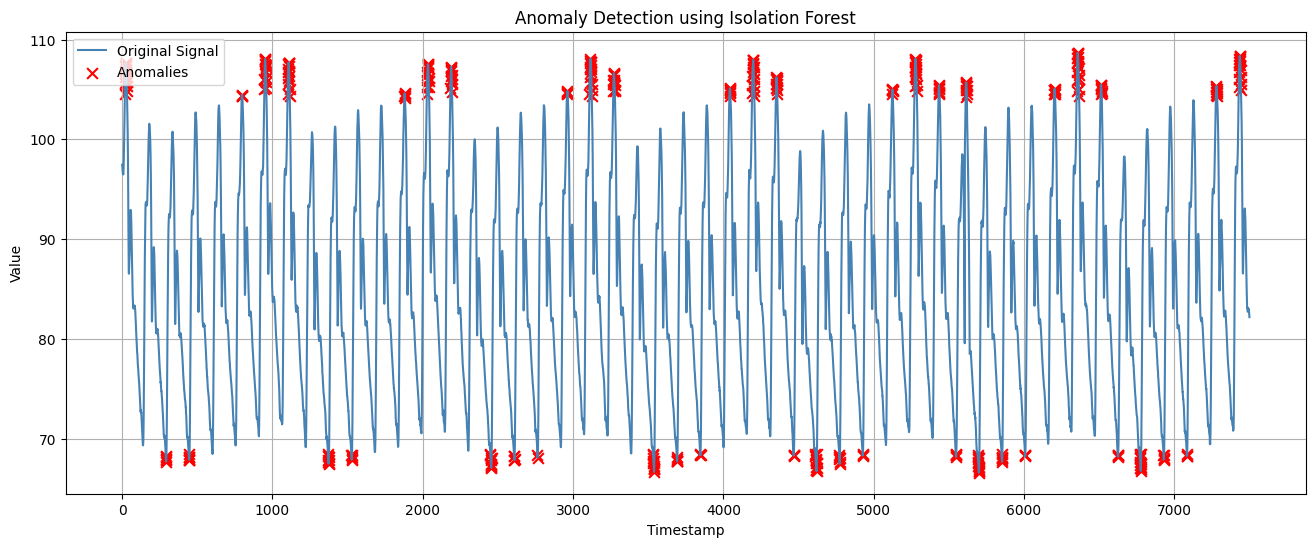

In [ ]:
plt.figure(figsize=(16,6))
plt.plot(df['timestamp'], df['value'], label='Signal', color='lightgray')

plt.scatter(
    df[df['anomaly'] == 1]['timestamp'],
    df[df['anomaly'] == 1]['value'],
    color='red',
    label='Anomalies',
    marker='x',
    s=60
)

plt.title('Anomaly Detection using Isolation Forest')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()



##### **Detected Anomalies - Observations**

The time series plot above shows the full InternalBleeding14 dataset after applying the Isolation Forest model.

- The blue curve represents the complete signal across all timestamps.
- The red 'x' markers indicate data points flagged as anomalies by the model.

This visualisation allows us to verify that the Isolation Forest correctly identifies both unusually high peaks and abnormally low troughs in the signal, which represent deviations from the expected cyclic pattern. The model successfully isolates outliers that deviate from the typical oscillating behaviour of the physiological sensor data.

This plot serves as a quick initial verification that the model is operational and sensitive to unusual fluctuations. Detailed validation will follow in later stages.


---

##### **Extension Exercise: Apply Isolation Forest to the Fantasia Dataset**

Now that you have verified the Isolation Forest model on the `InternalBleeding14` dataset, you are invited to apply the same anomaly detection pipeline to a second time series: `209Fantasia_clean.csv`.

This dataset, derived from the UCR Time Series Anomaly Archive (2021), contains 92,000 continuous measurements that simulate periodic signal fluctuations. Unlike the physiological spikes in InternalBleeding14, Fantasia presents a cleaner, more stable waveform — ideal for modelling in contexts such as healthcare, transport, or sensor monitoring.

 **You are encouraged to:**
- Load the Fantasia dataset from the `/data` folder
- Apply the same preprocessing and Isolation Forest model
- Plot the detected anomalies using the familiar red 'x' visualisation
- Compare the anomaly patterns against what you observed in the previous dataset

 **Reflection prompts:**
- How do the results differ in scale and pattern?
- Are anomalies easier or harder to interpret in Fantasia?
- Would you adjust Isolation Forest parameters in light of the signal quality?

This exercise reinforces your understanding of how anomaly detection behaves across datasets with differing rhythm, noise levels, and domain characteristics.


In [ ]:
file_path = 'data/209Fantasia_clean.csv'